## Q1
### (a)

**Input**: $\bold{a} \in \mathbb{R}^{n-1}, \bold{b} \in \mathbb{R}^{n}, \bold{v}\in \mathbb{R}^{n-1}$

**Output**: $\bold{l} \in \mathbb{R}^{n-1}, \bold{u} \in \mathbb{R}^{n}, \bold{v}\in \mathbb{R}^{n-1}$
1. $\bold{l} = \bold{0}$
1. for $i = 1, \cdots, n$
    - if $i \neq n$:
        - $v_i = c_i$
    - if $i > 1$:
        - $l_i = a_i / u_{i-1}$
    - $u_i = b_i - l_i v_{i-1}$
1. endfor

### (b)
$C(n) = 3n - 1$

There are $n$ interations. For each iteration, calculation of $l_i$ takes one operation, $u_i$ takes two operations, and $v_i$ takes none. The first iteration does not calculate $l_i$ and $v_i$. Therefore, the total number of operations is $3n - 1$.

### (c)

In [11]:
import numpy as np
def LUtri(a, b, c):
    """
    LU factorisation of a tridiagonal matrix
    Input:
        a, b, c: numpy arrays of size n-1, n, n-1
    Output:
        l, u, v: numpy arrays of size n-1, n, n-1
    """

    # a[i] = a_{i+2}
    # b[i] = b_{i+1}
    # c[i] = c_{i+1}
    # find dimension of b
    n = b.size

    # initialise l, u, v
    l = np.zeros(n-1) # we have l[i] = l_{i+2}
    u = np.zeros(n) # u[i] = u_{i+1}
    v = np.zeros(n-1) #v[i] = v_{i+1}

    for i in range(1,n+1):
        u[i-1] = b[i-1] - l[i-2]*v[i-2]
        if i != n:
            v[i-1] = c[i-1]
        if i > 1:
            l[i-2] = a[i-2]/u[i-2]
        u[i-1] = b[i-1] - l[i-2]*v[i-2]
    
    return l, u, v


In [12]:
import numpy as np
# These are some auxiliary functions
def get_abc_From_A(A):
    """
    input:
        n*n matrix A as numpy array
    output:
        n-1 dimensional vector a
        n dimensional vector b
        n-1 dimensional vector c
        They are input of LUtri
    """
    b = np.diag(A)
    a = np.diag(A, k=-1)
    c = np.diag(A, k=1)
    return a, b, c

def get_A_From_abc(a, b, c):
    """
    input:
        n-1 dimensional vector a
        n dimensional vector b
        n-1 dimensional vector c
    output:
        n*n matrix A as numpy array
    """
    n = b.size
    A = np.zeros((n,n))
    A = np.diag(a, k=-1) + np.diag(b, k=0) + np.diag(c, k=1)
    return A

def random_tridiagonal_matrix(n):
    """
    input:
        n: dimension
    output:
        n*n matrix A as numpy array
    """
    a = np.random.rand(n-1)
    b = np.random.rand(n)
    c = np.random.rand(n-1)
    return get_A_From_abc(a, b, c)

def get_L_from_l_of_LUtri(l):
    """ 
    input:
        n dimensional vector l from LUtri
    output:
        n*n matrix L as numpy array, that is L = diag(1) + diag(l, -1)
    """

    return np.diag(np.ones(len(l)+1), 0) + np.diag(l, -1)

def get_U_from_u_v_of_LUtri(u, v):
    """ 
    input: 
        n dimensional vector u from LUtri
        n dimensional vector v from LUtri
    output:
        n*n matrix U as numpy array, that is U = diag(u) + diag(v, 1)
    """
    return np.diag(u, 0) + np.diag(v, 1)


A = 


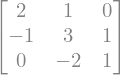

L = 


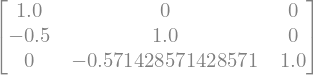

U = 


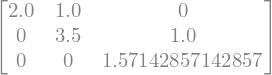

LU = 


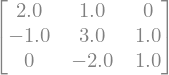

In [13]:
import numpy as np
from sympy import init_printing, Matrix
init_printing()
# construct A as instructed
A = np.array([[2, 1, 0], [-1, 3, 1], [0, -2, 1]])

# extract the diagonals
a, b, c = get_abc_From_A(A)

# call LUtri
l, u, v = LUtri(a, b, c)

# construct L and U from the output of LUtri
L = get_L_from_l_of_LUtri(l)
U = get_U_from_u_v_of_LUtri(u, v)

#check that A = LU
print("A = ")
display(Matrix(A))
print("L = ")
display(Matrix(L))
print("U = ")
display(Matrix(U))
print("LU = ")
display(Matrix(L@U))

### (d) Benchmarking

In [15]:
def LU(A):
    
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1): # loop over columns 1 to n-1
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k 
                                                     # from row j to create zeros 
                                                     # below the diagonal in column k
    
    return L, U # return the LU factorisation of A

In [16]:
import time
import numpy as np

number_iteration = 100
size_of_matrix = 100
time_LUtri = 0
time_LU = 0

for i in range(number_iteration):
    A = random_tridiagonal_matrix(size_of_matrix)
    tmp = time.time()
    a, b, c = get_abc_From_A(A)
    LUtri(a, b, c)
    time_LUtri += time.time() - tmp

    tmp = time.time()
    LU(A)
    time_LU += time.time() - tmp

print("time_LUtri = ", time_LUtri)
print("time_LU = ", time_LU)




time_LUtri =  0.00890207290649414
time_LU =  1.0001060962677002


### 1(e)

In [17]:
import numpy as np

def FStri(L, r):
    """
    Forward substitution for a lower triangular matrix
    Input:
        L: numpy array of size n*n
        r: numpy array of size n
    Output:
        y: numpy array of size n
    """
    n = r.size
    y = np.zeros(n)
    y[0] = r[0]
    for i in range(1,n):
        y[i] = r[i] - L[i][i-1]*y[i-1]

    return y

def BStri(U, y):
    """
    Backward substitution for an upper triangular matrix
    Input:
        U: numpy array of size n*n
        y: numpy array of size n
    Output:
        x: numpy array of size n
    """
    n = y.size
    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = (y[i] - U[i][i+1]*x[i+1])/U[i][i]

    return x


def GEtri(A, r):
    """
    Gaussian elimination for a tridiagonal matrix
    Input:
        A: numpy array of size n*n
        r: numpy array of size n
    Output:
        x: numpy array of size n
    """
    
    a, b, c = get_abc_From_A(A)
    l, u, v = LUtri(a, b, c)
    L  = get_L_from_l_of_LUtri(l)
    U = get_U_from_u_v_of_LUtri(u, v)
    y = FStri(L, r)
    x = BStri(U, y)
    return x


In [18]:
a = np.array([1, 3, 1])
b = np.array([1, 1, -2, 3])
c = np.array([2, -1, 1])

r = np.array([1,2,3,4])

A = get_A_From_abc(a, b, c)
x = GEtri(A, r)
print(x)
print(np.linalg.solve(A, r))

[ 1.25  -0.125 -0.875  1.625]
[ 1.25  -0.125 -0.875  1.625]


## Q2
### Q2(a)

Use taylor expansion of $w(x \pm h)$:
$$
w(x + h) = w(x) + h w'(x) + \frac{h^2}{2} w''(x) + O_1(h^3)
$$

$$
w(x - h) = w(x) - h w'(x) + \frac{h^2}{2} w''(x) + O_2(h^3)
$$

Combine them and we have 

$$
w(x + h) + w(x - h) \approx 2w(x) + h^2 w''(x) \Rightarrow w''(x) \approx \frac{w(x + h) + w(x - h) - 2w(x)}{h^2}
$$

### Q2(b)
$\bold{a}_i = \bold{c}_i= \frac{1}{h^2} $ They are $N-2$ dimensional vectors.

$\bold{b}_i = (-\frac{2}{h^2} + \omega^2)$ They are $N-1$ dimensional vectors.

$\bold{r}_i = \omega^2 f(x_i)$

### Q2(c)


In [28]:
def BVP(N, omega, f):
    """
    Solve the BVP
    w''(x) + omega^2*w(x) = omega^2 f(x)
    With boundary conditions w(0) = w(1) = 0

    Input:
        N: number of grid points
        omega: a parameter
        f: function f(x)
    Output:
        x: a numpy array of size N that is the independent variable of the solution
        w: a numpy array of size N that is the dependent variable of the solution
        w(x) is the solution of the BVP
    """
    # calculate h
    h = 1/N
    x = np.linspace(0, 1, N+1)
    a = np.ones(N-2)/(h**2)
    c = a 
    b = (-2/(h**2) + omega**2)*np.ones(N-1)
    r = omega**2*f(x[1:-1])

    # solve the tridiagonal system
    w = GEtri(get_A_From_abc(a, b, c), r)
    
    # add the boundary conditions
    w = np.insert(w, 0, 0)
    w = np.append(w, 0)
    return x, w

    

## Q2(d)

In [42]:
import numpy as np
# the exact solution

def w_exact(x, omega):
    """
    This is the exact solution of the BVP when f(x) = 1
    """
    return (np.sin(omega) - np.sin(omega*x) - np.sin(omega*(1-x)))/(np.sin(omega))

def error(N, omega):
    """
    Calculate the error of the numerical solution
    Input:
        N: number of grid points
        omega: a parameter
        f: function f(x)
    Output:
        e: the error
    """
    def functionf(x):
        return x-x+1
    x, w = BVP(N, omega, functionf)
    diff = w[1:-1] - w_exact(x, omega)[1:-1]
    e = np.linalg.norm(diff, ord=2)
    return e

def get_norm_of_exact(N, omega):
    """
    Calculate the norm of the exact solution
    Input:
        N: number of grid points
        omega: a parameter
    """
    x = np.linspace(0, 1, N+1)
    x = np.delete(x, 0)
    solution = w_exact(x, omega)
    return np.linalg.norm(solution, ord=2)


omega = 20

errorList = []

n_list = [int(i) for i in np.linspace(100, 1000, 100)]

for i in n_list:
    errorList.append(error(int(i), omega)/get_norm_of_exact(int(i), omega))


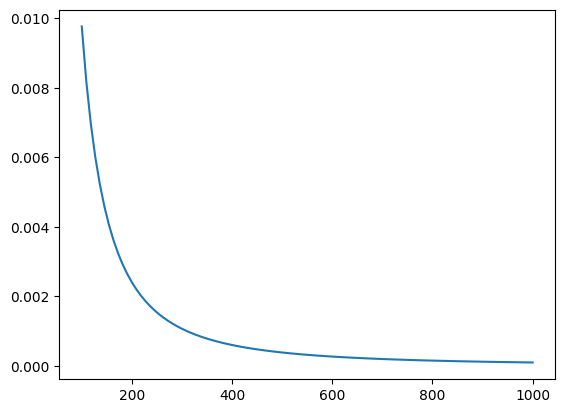

In [43]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(n_list, errorList)  # Plot some data on the axes